# **Machine Learning para Business Intelligence** 
#### Profesor: Santiago Neira Hernández

## Clase 5: Clasificación parte 2



### CART, Bagging, Random Forest y Boosting

Los árboles de decisión son formas extremadamente intuitivas para clasificar o etiquetar objetos: simplemente hace una serie de preguntas diseñadas para concentrarse en la regresión o clasificación.
Por ejemplo, si desea construir un árbol de decisión para clasificar una casa, puede construir el que se muestra aquí:

<center>
<img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/decision-tree-house.png" alt="decision_tree" style="width: 700px;" align="center" frameborder="200"/>
</center>

En esta clase vamos a ver los modelos de clasificación/regresión relacionados con CART. 

Cubriremos los siguientes temas:
- Selección de hiper-parámetros.
- Interpretación de los árboles.
- Explicabilidad en CART.
- Importancia de variables.
- Evaluación de los modelos.
- Selección de variables.

Estudiaremos los siguientes cuatro modelos:
- Árboles de clasificación
- Bagging
- Random Forest (Bosques aleatorios)
- Gradient Boosting Machine

#### Contraceptive Method Choice Data Set
Esta base es una muestra de una encuesta sobre anticonceptivos en 1987 en Indonesia. Las muestras son mujeres casadas que podían estar o no embarazadas y no lo sabían al momento de la entrevista. __El problema de predicción será predecir si se usa o no algún método anticonceptivo.__ La base contiene una columna de método anticonceptivo codificada como:

0. No se usa
1. Largo plazo
2. Corto plazo

Para ver una descripción más detallada vea: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

In [1]:
# 1. Wife's age (numerical)
# 2. Wife's education (categorical) 1=low, 2, 3, 4=high
# 3. Husband's education (categorical) 1=low, 2, 3, 4=high
# 4. Number of children ever born (numerical)
# 5. Wife's religion (binary) 0=Non-Islam, 1=Islam
# 6. Wife's now working? (binary) 0=Yes, 1=No
# 7. Husband's occupation (categorical) 1, 2, 3, 4
# 8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
# 9. Media exposure (binary) 0=Good, 1=Not good
# 10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

In [2]:
## pip install ucimlrepo

## 0. Importación y manipulación básica de la base

In [3]:
from ucimlrepo import fetch_ucirepo 


# fetch dataset 
contraceptive_method_choice = fetch_ucirepo(id=30) 
  
# data (as pandas dataframes) 
feats = contraceptive_method_choice.data.features 
targets = contraceptive_method_choice.data.targets 


import pandas as pd
X=pd.DataFrame(feats)
y=pd.DataFrame(targets)
data=pd.concat([X,y],axis=1)

In [4]:
data

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [5]:
data.head(10)

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


In [6]:
data.shape

(1473, 10)

In [7]:
data.husband_occupation.unique()

array([2, 3, 1, 4], dtype=int64)

In [8]:
##Las variables de todas las variables tienen sentido?
data.mean()

wife_age                    32.538357
wife_edu                     2.958588
husband_edu                  3.429735
num_children                 3.261371
wife_religion                0.850645
wife_working                 0.749491
husband_occupation           2.137814
standard_of_living_index     3.133741
media_exposure               0.073999
contraceptive_method         1.919891
dtype: float64

In [9]:
##Dummies
data=pd.get_dummies(data, columns=["husband_occupation","wife_edu","husband_edu"])

In [10]:
##Tratamiento balanceado
data.contraceptive_method.value_counts(normalize=True)

contraceptive_method
1    0.427020
3    0.346911
2    0.226069
Name: proportion, dtype: float64

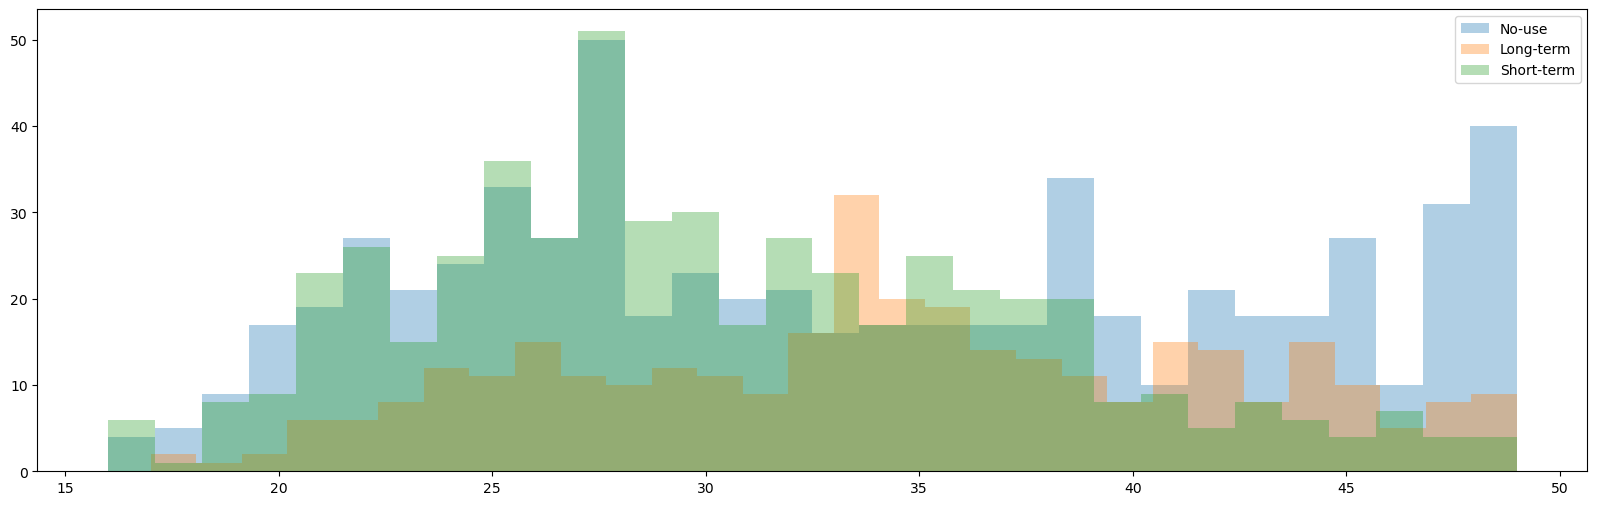

In [11]:
##Algunas visualizaciones
import matplotlib.pyplot as plt

plt.figure(figsize = (20,6)) 
# Histograma de edad de la esposa para los Contraceptive == 1
plt.hist(data.wife_age.loc[data.contraceptive_method == 1], alpha = 0.35, label = 'No-use', bins = 30) 
# Histograma de edad de la esposa para los Contraceptive==2
plt.hist(data.wife_age.loc[data.contraceptive_method == 2], alpha = 0.35, label = 'Long-term', bins = 30) 
# Histograma de edad de la esposa para los Contraceptive==3
plt.hist(data.wife_age.loc[data.contraceptive_method == 3], alpha = 0.35, label = 'Short-term', bins = 30) 
# Que aparezca la leyenda
plt.legend(); 

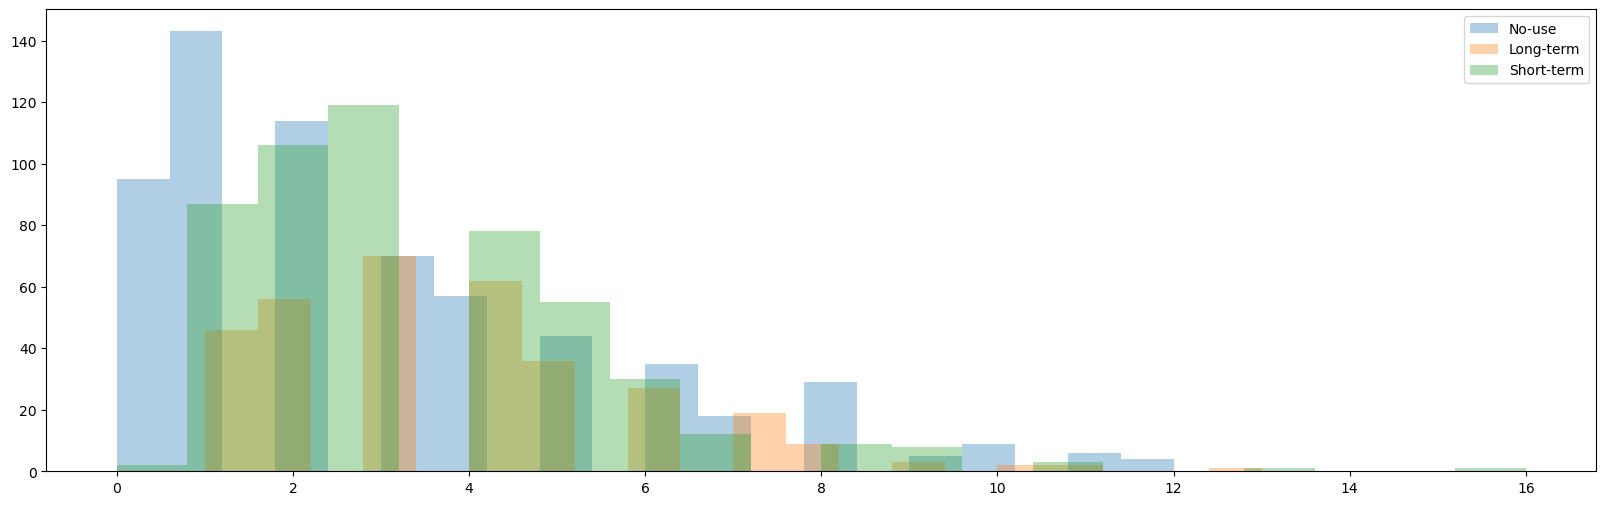

In [12]:
plt.figure(figsize = (20,6)) 
# Histograma de número de hijos para los Contraceptive==1
plt.hist(data.num_children.loc[data.contraceptive_method == 1], alpha = 0.35, label = 'No-use', bins = 20) 
# Histograma de número de hijos para los Contraceptive==2
plt.hist(data.num_children.loc[data.contraceptive_method == 2], alpha = 0.35, label = 'Long-term', bins = 20) 
# Histograma de número de hijos para los Contraceptive==3
plt.hist(data.num_children.loc[data.contraceptive_method == 3], alpha = 0.35, label = 'Short-term', bins = 20) 
plt.legend(); # Que aparezca la leyenda

## 1. Entrenemos nuestro primer árbol!

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
X = data.drop(columns = 'contraceptive_method')

##Como problema de clasificación SOLAMENTE NOS VAMOS A ENFOCAR EN SI USA O NO ANTICONCEPTIVO
data['use_contraceptive']=np.where(data['contraceptive_method']==1,0,1)
y = data['use_contraceptive']
# Necesitamos separar la muestra en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)

In [14]:
y.value_counts()

use_contraceptive
1    844
0    629
Name: count, dtype: int64

In [15]:
print('El tamaño de la muestra de entrenamiento es ', X_train.shape)
print('El tamaño de la muestra de prueba es ', X_test.shape)
print('El tamaño del vector de marca de entrenamiento es ', y_train.shape)
print('El tamaño del vector de marca de prueba es ', y_test.shape)

El tamaño de la muestra de entrenamiento es  (1178, 18)
El tamaño de la muestra de prueba es  (295, 18)
El tamaño del vector de marca de entrenamiento es  (1178,)
El tamaño del vector de marca de prueba es  (295,)


In [16]:
# importe de scikit-learn el módulo tree, el cual contiene árboles de clasificación
from sklearn import tree 

In [17]:
# Construyo el objeto que es el árbol de clasificación
arbol = tree.DecisionTreeClassifier(max_depth = 15, random_state = 23) 
# Estimo el modelo
arbol.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=15, random_state=23)

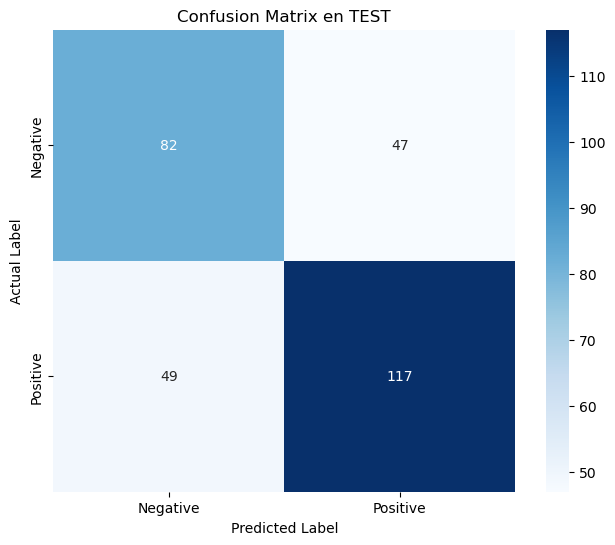

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import seaborn as sns
# Predicción dentro y fuera de muestra
y_pred_train = arbol.predict(X_train)
y_pred = arbol.predict(X_test)


cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix en TEST')
plt.show()


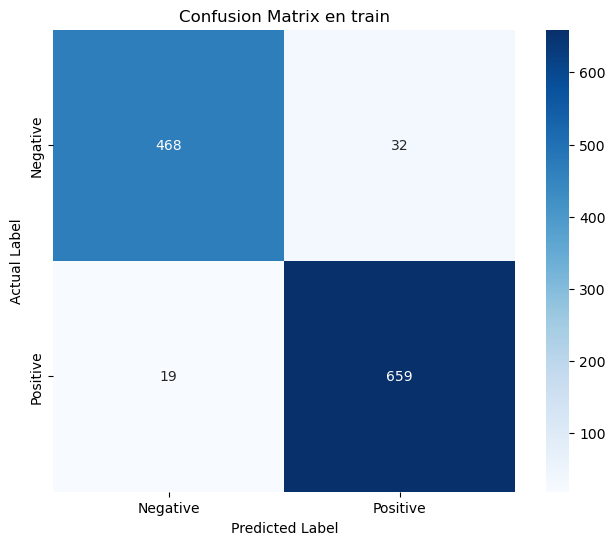

In [19]:
cm=confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix en train')
plt.show()


In [20]:
##Accuracy
print("El accuracy score en test " + str(accuracy_score(y_test,y_pred)))
print("\n")
print("El accuracy score en train " + str(accuracy_score(y_train,y_pred_train)))

El accuracy score en test 0.6745762711864407


El accuracy score en train 0.9567062818336163


Tenemos **overfitting!!**. Hagamos un primer tuning del modelo.

In [21]:
from sklearn.model_selection import GridSearchCV
##Instanciamos
arbol = tree.DecisionTreeClassifier(random_state = 23) 
##Declaramos la grilla
grilla_arbol = {"max_depth": [3, 5, 7, 9, 11, 13, 15, 17]}
##Ponemos el modelo de GridSearchCV
arbol_cv = GridSearchCV(arbol, grilla_arbol, scoring = "accuracy", return_train_score = True, cv = 10)
arbol_cv.fit(X, y)

print("La mejor profundidad es: " + str(arbol_cv.best_params_))

La mejor profundidad es: {'max_depth': 5}


In [22]:
cv_tree_results = pd.DataFrame(arbol_cv.cv_results_)

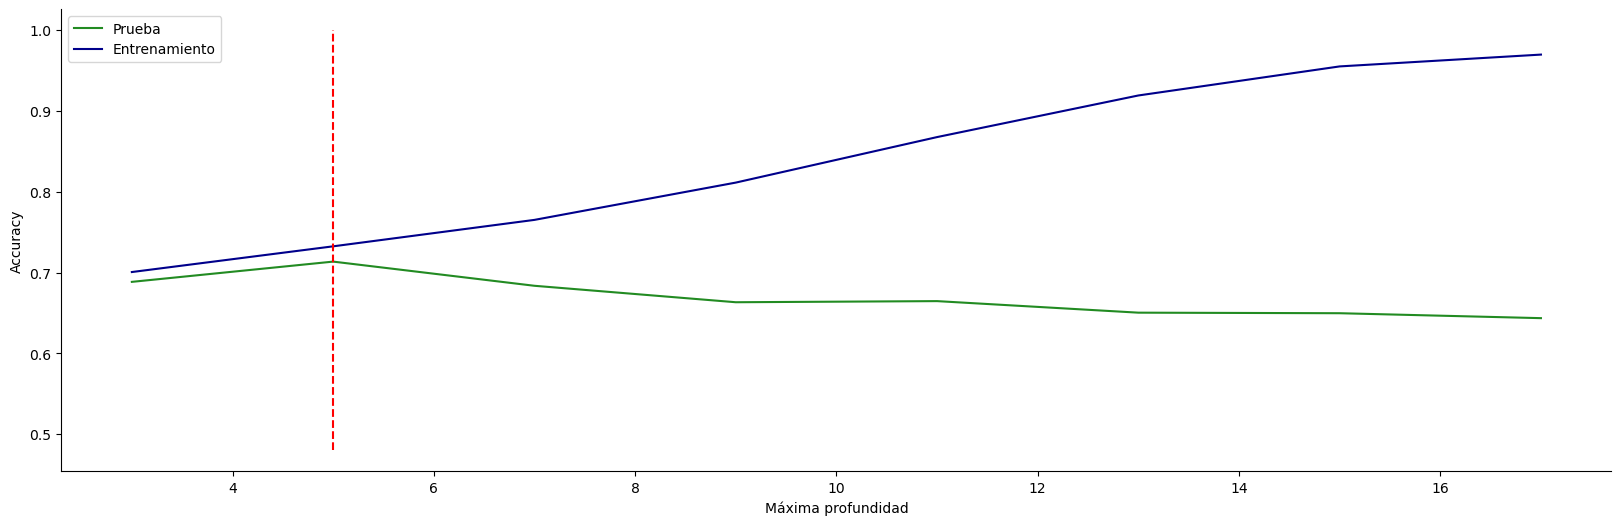

In [23]:
import seaborn as sns

# Visualicemos
fig, ax = plt.subplots(figsize = (20, 6))
sns.despine()
sns.lineplot(data = cv_tree_results, x = 'param_max_depth', y = 'mean_test_score', ax = ax, color = "forestgreen",
             label = "Prueba")
sns.lineplot(data = cv_tree_results, x = 'param_max_depth', y = 'mean_train_score', ax = ax, color = "darkblue",
             label = "Entrenamiento")
plt.legend()
ax.set_xlabel("Máxima profundidad")
ax.set_ylabel("Accuracy")
plt.vlines(x = arbol_cv.best_params_["max_depth"], ymin = 0.48, ymax = 1, color = "red", 
           linestyles = "dashed")

In [24]:
##Veamos los resultados
arbol_optimo = tree.DecisionTreeClassifier(**arbol_cv.best_params_) 
arbol_optimo.fit(X_train,y_train)
y_pred_tree = arbol_optimo.predict(X_test)
y_pred_train_tree = arbol_optimo.predict(X_train)
print("El accuracy score en test " + str(accuracy_score(y_test,y_pred)))

El accuracy score en test 0.6745762711864407


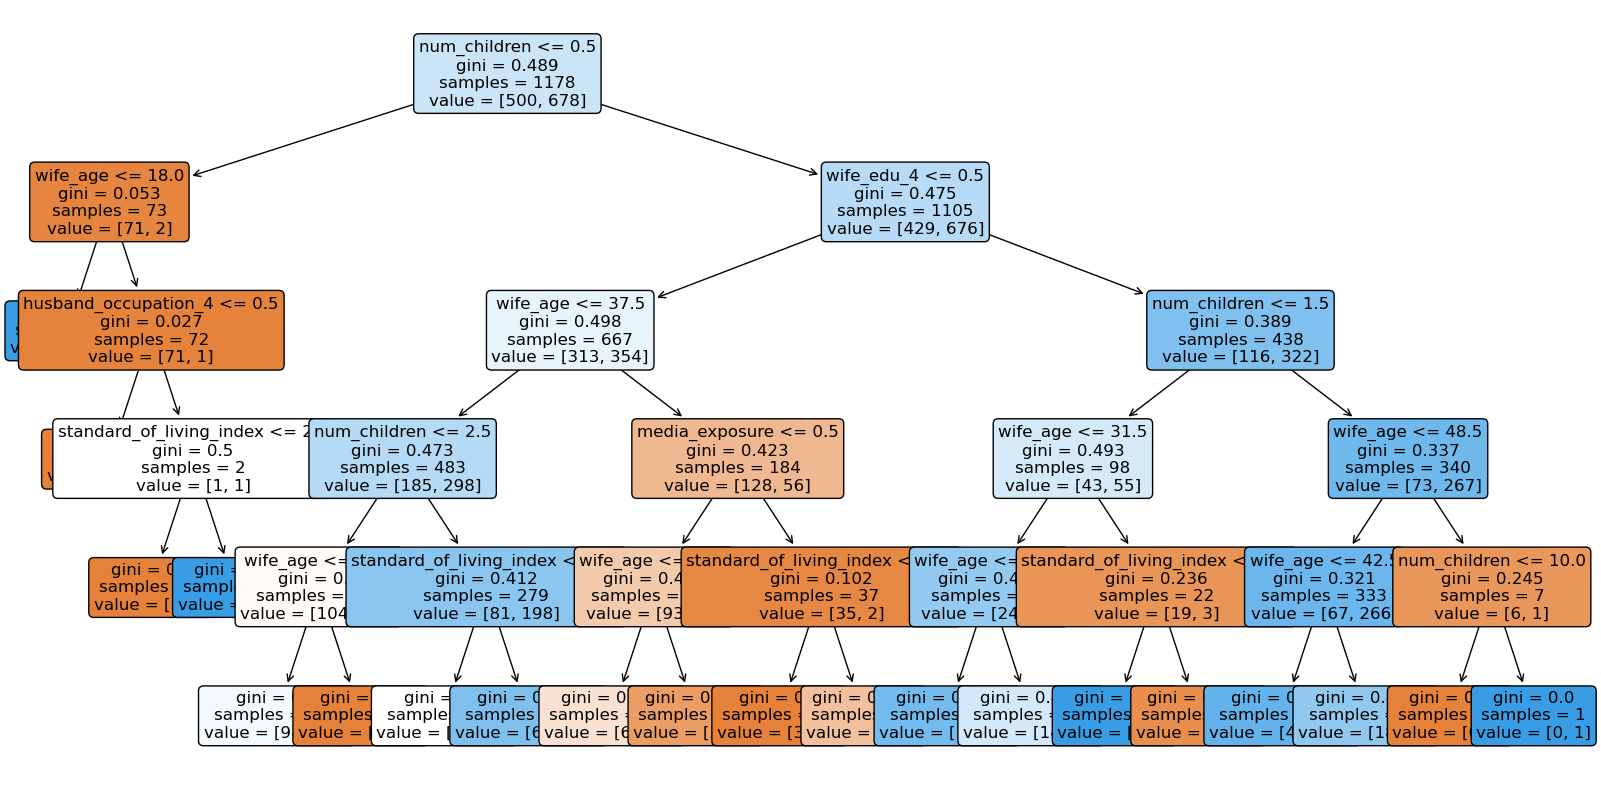

In [25]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20, 10))  # Increase figure size for better clarity
plot_tree(arbol_optimo, filled=True, rounded=True, fontsize=12,feature_names=X.columns.tolist())

# Save the figure with high quality
plt.savefig('tree_high_quality.png', format='png', dpi=300)
#plt.close()  # Close the plotting window

### 2. Interpretabilidad -> feature importance

In [26]:
importancia_arbol = pd.DataFrame(arbol_cv.best_estimator_.feature_importances_,
                                 index = X_train.columns,
                                 columns = ['Importancia']).sort_values("Importancia", ascending = False)
importancia_arbol

,Importancia
num_children,0.447344
wife_age,0.349968
wife_edu_4,0.149187
media_exposure,0.027623
standard_of_living_index,0.016134
husband_edu_4,0.007413
husband_occupation_4,0.002331
husband_occupation_1,0.000000
husband_occupation_2,0.000000
husband_occupation_3,0.000000


<Axes: >

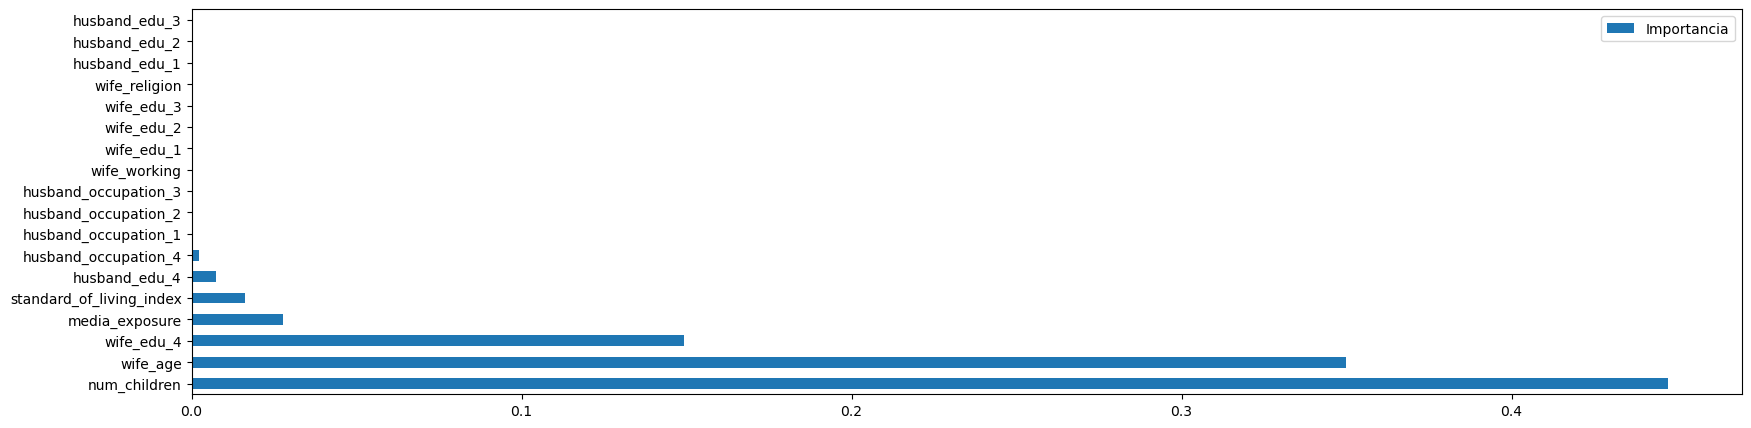

In [27]:
# Visualización de la importancia
importancia_arbol.plot(kind = 'barh', figsize=(20, 5))

### SHAP

In [28]:
## pip install shap

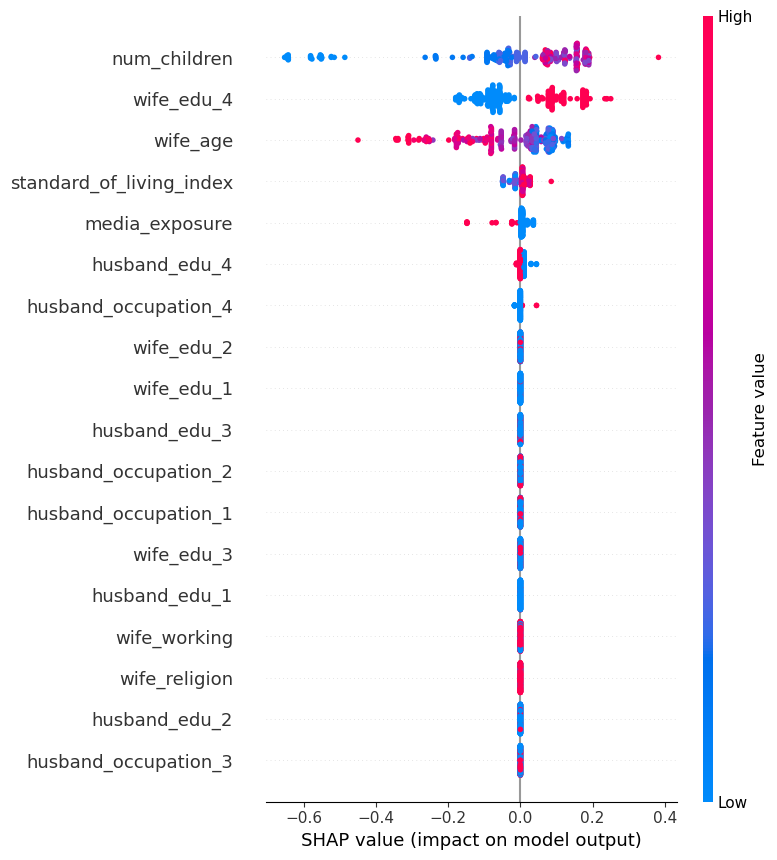

In [29]:
import shap
explainer = shap.TreeExplainer(arbol_cv.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="dot")
##A mayor educación hay mayor probabilidad de tener un anticonceptivo

### 3. Métodos de Ensamblaje

### 3.1 Bagging

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,  random_state=42)

bc = BaggingClassifier(base_estimator=dt, n_estimators=400, n_jobs=-1)

bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Accuracy of Bagging Classifier: 0.756


### 3.2 Random Forest

In [31]:
# Importo la función para estimar RandomForest
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(max_depth = 6, n_estimators = 100, random_state = 23)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, random_state=23)

In [33]:
# Predicción dentro y fuera de muestra
y_pred_train_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

##Accuracy
print("El accuracy score en test " + str(accuracy_score(y_test,y_pred_rf)))
print("\n")
print("El accuracy score en train " + str(accuracy_score(y_train,y_pred_train_rf)))

El accuracy score en test 0.7084745762711865


El accuracy score en train 0.7784380305602716


In [34]:
rf = RandomForestClassifier(random_state = 23)
grilla_rf = {"max_depth": [3, 5, 7, 9, 11, 13, 15, 17],
            "n_estimators": [50, 100, 150, 200]}
rf_cv = GridSearchCV(rf, grilla_rf, scoring = "accuracy", return_train_score = True, cv = 10)
rf_cv.fit(X_train, y_train)
y_pred_train_rf = rf_cv.predict(X_train)
y_pred_rf = rf_cv.predict(X_test)

In [35]:
print("El accuracy score en test " + str(accuracy_score(y_test,y_pred_rf)))
print("\n")
print("El accuracy score en train " + str(accuracy_score(y_train,y_pred_train_rf)))

El accuracy score en test 0.7186440677966102


El accuracy score en train 0.7971137521222411


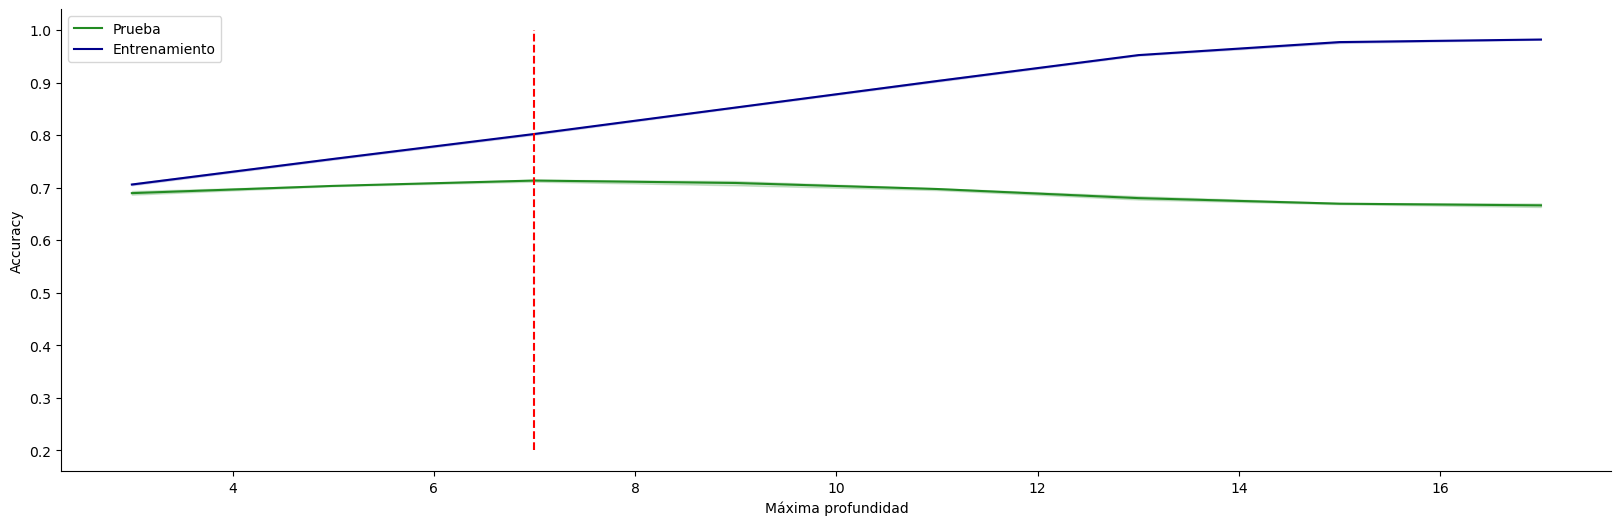

In [36]:
cv_rf_results = pd.DataFrame(rf_cv.cv_results_)
# Visualicemos
fig, ax = plt.subplots(figsize = (20, 6))
sns.despine()
sns.lineplot(data = cv_rf_results, x = 'param_max_depth', y = 'mean_test_score', ax = ax, color = "forestgreen",
             label = "Prueba")
sns.lineplot(data = cv_rf_results, x = 'param_max_depth', y = 'mean_train_score', ax = ax, color = "darkblue",
             label = "Entrenamiento")
plt.legend()
ax.set_xlabel("Máxima profundidad")
ax.set_ylabel("Accuracy")
plt.vlines(x = rf_cv.best_params_["max_depth"], ymin = 0.2, ymax = 1, color = "red",
           linestyles = "dashed")

In [37]:
### Recordemos el feature importance --- Hagamos un feature selection

In [38]:
# Estudiamos la importancia de las variables en el RandomForest
importancia_rf = pd.DataFrame(rf_cv.best_estimator_.feature_importances_, 
                            index = X_train.columns, 
                            columns = ['Importancia']).sort_values("Importancia", ascending = False)
importancia_rf

,Importancia
num_children,0.336909
wife_age,0.231393
standard_of_living_index,0.070346
wife_edu_4,0.054537
wife_edu_1,0.045313
media_exposure,0.044884
wife_edu_2,0.025596
husband_edu_2,0.023993
wife_working,0.023697
husband_edu_4,0.022130


<Axes: >

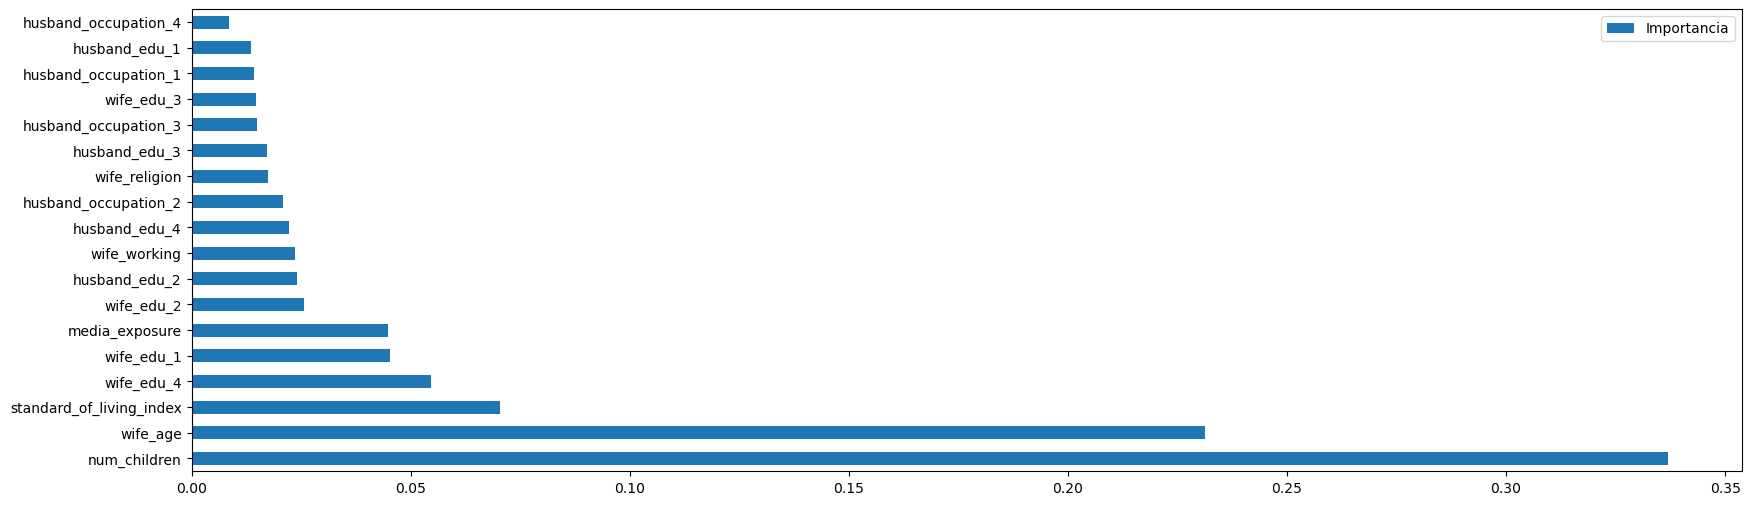

In [39]:
# Visualización de la importancia
importancia_rf.plot(kind = 'barh', figsize = (20,6))

## 3.3 Boosting


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
# Predicción dentro y fuera de muestra
y_pred_train_gbc = gbc.predict(X_train)
y_pred_gbc = gbc.predict(X_test)

In [42]:
print("El accuracy score en test " + str(accuracy_score(y_test,y_pred_gbc)))
print("\n")
print("El accuracy score en train " + str(accuracy_score(y_train,y_pred_train_gbc)))

El accuracy score en test 0.711864406779661


El accuracy score en train 0.7903225806451613


## Ejercicio 1 
Entrene un clasificador de boosting para el dataset que venimos trabajando para encontrar los mejores hiperparámetros. Los hiperparámetros que debe revisar son:
1. learning_rate
2. n_estimators
3. max_depth

Escriba un resumen de cada hiperparámetro, defina valores que tengan sentido para la tarea y encuentre el mejor estimador. Compare los resultados con los otros vistos en el notebook.

Por último, concluya si es un buen modelo o no para estos datos y encuentre la importancia de las variables.

**Nota:** entre más opciones de parámetros utilice, más se demora el entrenamiento. Si se está demorando mucho puede bajar la cantidad de valores a revisar para cada hiperparámetro.

## Ejercicio 2 (Tarea)
Ahora implemente todo el framework estudiado en la clase de hoy cuando queremos identificar qué tipo de método anticonceptivo se usa. Es decir, cuando se quiere diferenciar entre no usar anti-conceptivo, anticonceptivo de corto plazo y anticonceptivo de largo plazo. Qué diferencias ve?